# 2025.04.08
## Time-series data

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
#DatatimeIndex()
d_list = ['04/08/2025', '04-08-2025','2025-04-08', '2025/04/08']
year = pd.DatetimeIndex(d_list).year
month = pd.DatetimeIndex(d_list).month
day = pd.DatetimeIndex(d_list).day
print(type(year))
print(year)
print(month)
print(day)

<class 'pandas.core.indexes.base.Index'>
Index([2025, 2025, 2025, 2025], dtype='int32')
Index([4, 4, 4, 4], dtype='int32')
Index([8, 8, 8, 8], dtype='int32')


In [24]:
dt_list = ['2025-04-08 15:36:57', '2025/04/08 15:37:00']
hour = pd.DatetimeIndex(dt_list).hour
second = pd.DatetimeIndex(dt_list).second
print(hour)
print(second)

Index([15, 15], dtype='int32')
Index([57, 0], dtype='int32')


In [20]:
# weather 데이터 읽어오기
file_path = './data/weather.csv'
weather = pd.read_csv(file_path, encoding = 'CP949')
weather.head()

,일시,평균기온,최대풍속,평균풍속
0,2010-08-01,28.7,8.3,3.4
1,2010-08-02,25.2,8.7,3.8
2,2010-08-03,22.1,6.3,2.9
3,2010-08-04,25.3,6.6,4.2
4,2010-08-05,27.2,9.1,5.6


In [43]:
# 연도, 월, 일 컬럼 추가해서 데이터 추출
weather['연도'] = pd.DatetimeIndex(weather['일시']).year
weather['월'] = pd.DatetimeIndex(weather['일시']).month
weather['일'] = pd.DatetimeIndex(weather['일시']).day
weather

,일시,평균기온,최대풍속,평균풍속,연도,월,일
0,2010-08-01,28.7,8.3,3.4,2010,8,1
1,2010-08-02,25.2,8.7,3.8,2010,8,2
2,2010-08-03,22.1,6.3,2.9,2010,8,3
3,2010-08-04,25.3,6.6,4.2,2010,8,4
4,2010-08-05,27.2,9.1,5.6,2010,8,5
...,...,...,...,...,...,...,...
3648,2020-07-27,22.1,4.2,1.7,2020,7,27
3649,2020-07-28,21.9,4.5,1.6,2020,7,28
3650,2020-07-29,21.6,3.2,1.0,2020,7,29
3651,2020-07-30,22.9,9.7,2.4,2020,7,30


In [44]:
# 일정 연도만 데이터 추출
year_2010 = weather.loc[weather['연도'] == 2010]
year_2010

,일시,평균기온,최대풍속,평균풍속,연도,월,일
0,2010-08-01,28.7,8.3,3.4,2010,8,1
1,2010-08-02,25.2,8.7,3.8,2010,8,2
2,2010-08-03,22.1,6.3,2.9,2010,8,3
3,2010-08-04,25.3,6.6,4.2,2010,8,4
4,2010-08-05,27.2,9.1,5.6,2010,8,5
...,...,...,...,...,...,...,...
148,2010-12-27,0.5,8.1,4.0,2010,12,27
149,2010-12-28,3.6,8.9,4.6,2010,12,28
150,2010-12-29,1.0,7.1,2.5,2010,12,29
151,2010-12-30,-0.9,8.4,4.3,2010,12,30


In [71]:
# 12개의 None -> 리스트, 12개의 0 -> 리스트
monthly = [ None for x in range(12) ] #12개의 범위 내에서 x에 None을 입력
monthly_temp = [ 0 for x in range(12) ]
print(monthly_temp)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Text(0, 0.5, 'Temperature')

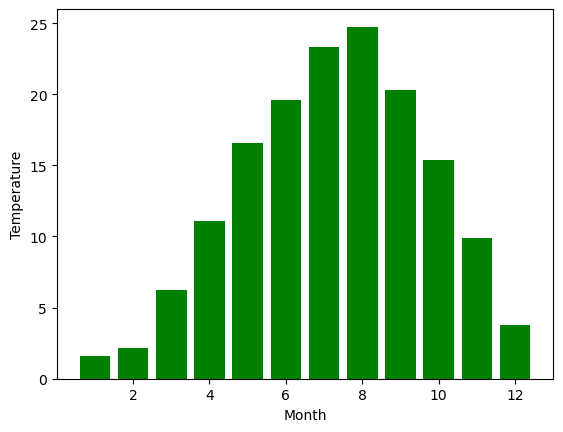

In [72]:
for i in range(12):
    monthly[i] = weather[weather['월'] == i + 1]
    monthly_temp[i] = monthly[i]['평균기온'].mean()
    months = np.arange(1,13)
plt.bar(months, monthly_temp, color='green')
plt.xlabel('Month')
plt.ylabel('Temperature')

# Q1. 2015년도의 월별 풍속을 막대그래프로 그리기

Text(0, 0.5, 'Wind')

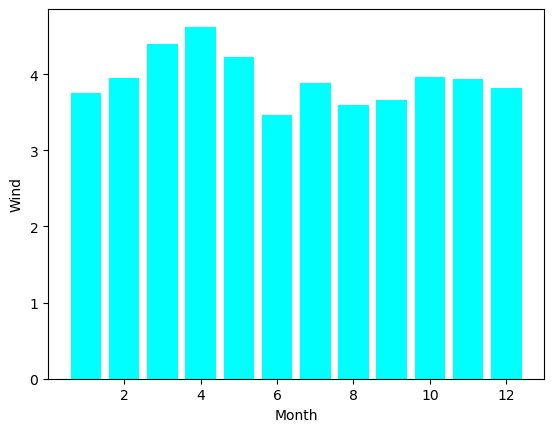

In [77]:
year_2015 = weather.loc[weather['연도'] == 2015]
monthly = [ None for x in range(12) ]
monthly_wind = [ 0 for x in range(12) ]

for i in range(12):
    monthly[i] = weather[weather['월'] == i + 1]
    monthly_wind[i] = monthly[i]['평균풍속'].mean()

months = np.arange(1,13)
plt.bar(months, monthly_wind, color='cyan')
plt.xlabel('Month')
plt.ylabel('Wind')